<h1><center>Digital Finance COMP0164<br>
Group Assignment<br>
Group 11<br>
    </center></h1>

In [1]:
#Import Statements
import pandas as pd
import numpy as np
import numpy_financial as npf
from numpy import log, exp, sqrt
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import seaborn as sns
import datetime
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting 

<h1><center> Answer 1 </center></h1>

<h2><span style="color:blue">1(a) Calculate the weighted average cost of capital of ABC prior to its new project
investment</span>

<h2><span style="color:green">Solution</span>

WACC gives us a company's proportionaly weighted cost of capital emanating from all the sources, bonds, common stocks, preferred stocks, and other forms of debt (Hargrave, 2022).

We calculate the WACC using the formula below 

<span style=font-size:2em;>$WACC = (1-T_{c})\times\bigg[r_{d}\times \frac{D}{V}\bigg] +\bigg[r_{e}\times \frac{E}{V}\bigg]---(1)$</span>

**Where,** <br>
**$T_{c}$ = Corporotate Tax Rate**<br>
**$r_{d}$ = Cost of Debt**<br>
**$r_{e}$ = Cost of Equity**<br>
**D = Market Value of Firm's Debt**<br>
**E = Market value of Firms's Equity**<br>
**V = Total Equity + Total Debt, i.e, E+D**<br>
**`(Hargrave, 2022)`**

<h3>Step 1

We calculate the Cost of equity($r_{e}$) using the CAPM model **`(Kenton, 2022)`**, using the following equation<br>

<span style= font-size:2em;> $r_{e}=r_{f}+\beta_{Equity} \times Equity Risk Premimum$---(2) </span>

**Where,**<br>
**$r_{f}$ = Risk Free Rate, given as 4.25%**<br>
**$\beta$ = Beta(Equity), given as 1.3**<br>
**Equity Risk Premium given as 4.82%**

In [2]:
r_e=(4.25/100)+1.3*(4.82/100)

print("The cost of equity is {} percent".format(np.round(r_e*100,2)))

The cost of equity is 10.52 percent


<h3>Step 2</h3>

Using the other values supplied<br>
**$T_{c}$ = 37.5%**<br>
**$r_{d}$ = 9.25%**<br>
**D = 900 million USD**<br>
**E = 2.4 billion USD**<br>
We calculate the WACC using equation(1) above



In [3]:
r_d= (9.25/100)
D=900*(10**6)
E=2.4*(10**9)
WACC=((D/(D+E))*r_d*(1-(37.5/100)))+(r_e*(E/(D+E)))
print("The WACC is {} percent".format(np.round(WACC*100,2)))

The WACC is 9.22 percent



<h2><span style="color:blue">1(b) Find ABC’s asset beta prior to the new project </span>


<h2><span style="color:green">Solution</span>

To find the Asset Beta, we will have to unlever the Equity Beta, that is,  calculate the Beta without the impact of Debt which will give us volatility of returns of the company without it's financial leverage **`(Corporate Finance Institute , Unlevered beta / asset beta 2022)`**. 

The **Asset Beta** will then be calculated using the following formula

<span style= font-size:2em;>$\beta_{Asset}$ = $\bigg( \frac{ \beta_{Equity}}{(1+(1-T_{c})\times \frac{D}{E}}\bigg)$---(3)</span>

**Where,**<br> 
**$T_{c}$ = Corporate Tax Rare**<br>
**D = Debt**<br>
**E = Equity**

In [4]:
equity_beta=1.3
tx=1-(37.5/100)
C=D/E
Asset_beta=equity_beta/(1+tx*C)
print("The Asset Beta is {}".format(np.round(Asset_beta,2)))

The Asset Beta is 1.05


<h2><span style="color:blue">1(c) If the new project has the same asset beta as the ABC company in b), find the
project equity beta. </span>

<h2><span style="color:green">Solution</span>

To calculate the Project Equity Beta, we use the "Pure Play Method" using only the Project's financials **`(IFT, CFA Free 101 concepts)`** and the company's Asset Beta calculated using equation (3). 

The Project Equity Beta is calculated using the following formula

<span style= font-size:2em;>$\beta_{Equity}$ = $\beta_{Asset}\space \times \space \bigg(1 + \frac{(1-T_{c})\space \times D}{E}\bigg)$---(4)</span>

**Where,**<br>
**$\beta_{Asset}$ = 1.05 (Calculated using eq (3)**<br>
**$T_{c}$ = 37.5%**<br>
**D = 80 million USD**<br>
**E = 20 million USD**<br>,

Therefore using equation(4)

In [5]:
beta_eq_2=Asset_beta*(1+tx*((80)/(20)))
print("The Project Equity Beta is {}".format(np.round(beta_eq_2,2)))

The Project Equity Beta is 3.69


<h2><span style="color:blue">1(d) The formula for project after-tax free cash flow at a certain time t is given by <br> <br>
FCF = (Revenues – Operating Costs – Depreciation) * (1 – Tax Rate) + Depreciation
    
Use python functions to automatically calculate project FCFs and prove that the aftertax free cash flow generated for the next three years are 48 million USD, 52 million USD, and
54.4 million USD, respectively. </span>

<h2><span style="color:green">Solution</span>

To calculate the Free Cash Flows for Year 1, Year 2, Year 3, we first input the data from Exhibit 2 into a DataFrame, using lists for Revenues, Operating Costs, and Depreciation

In [6]:
data = pd.DataFrame([[99.2,109.6,115.44], [32, 36,38],[16,16,16]] , columns=['Year1','Year2','Year3'], index=['Revenues', 'Operating Costs','Depreciation'])
print(data)

                 Year1  Year2   Year3
Revenues          99.2  109.6  115.44
Operating Costs   32.0   36.0   38.00
Depreciation      16.0   16.0   16.00


To implement the equation given in 1(d),

<h2>FCF = (Revenues – Operating Costs – Depreciation) * (1 – Tax Rate) + Depreciation---(4)</h2>

We implement a python function which accepts a DataFrame, Tax Rate, and Year as arguments and returns the Free Cash Flow

In [7]:
def FCF(dat,tax_rate,year):
    col=0
    if year==1:
        col="Year1"
    elif year==2:
        col="Year2"
    elif year==3:
        col="Year3"
    
    FCF= (dat[col]["Revenues"]-dat[col]["Operating Costs"]-dat[col]["Depreciation"])*(1-(tax_rate/100))+dat[col]["Depreciation"]
    
    return FCF

year_one=FCF(data,37.5,1)
year_two=FCF(data,37.5,2)
year_three=FCF(data,37.5,3)
print("The FCF for year one is {} million".format(year_one))
print("The FCF for year two is {} million".format(year_two))
print("The FCF for year three is {} million".format(year_three))


The FCF for year one is 48.0 million
The FCF for year two is 52.0 million
The FCF for year three is 54.4 million


<h2><span style="color:blue">1(e) Find the project NPV and IRR with the next three years after-tax free cash flow
given in d) </span>

<h2><span style="color:green">Solution</span>

To calculate the npv, we use numpy financial library along with using the cash flows generated in 1(d). 

The formula for calculating NPV is defined by 

<span style= font-size:2em;>$ NPV = \sum_{t=0}^{n} \frac{R_{t}}{(1+i)^t}-Initial\space Investment$---(5)</span>

**Where,**<br>
**$R_{t}$ = Net Cash inflow-outflow during the period t**<br>
**i = Required Return Rate or Discount Rate**<br>
**t = Number of Time Periods**<br>

**`(Jagerson, 2022)`**


<h3>Step 1: Calculate the Discount Rate for the Project 

To calculate the discount rate for the project, we are again going to refer to the CAPM model, already defined by equation (2) above in 1 (a) **`(Kenton, 2022)`** albeit with a change for we are looking here for the project specific figures. 

**The investment here is a 100 million USD** and on that investment we have already calculated a Project Equity $\beta$ or $\beta_{Equity}$ using equation (4)

The change in our CAPM model would therefore be to caclulate here the cost of equity(discount rate) specific to the project **`(ACCAGLOBAL, The Capital Asset Pricing Model – Part 2)`**

Therefore, using equation (2)

**Where,**<br>
**$R_{f}$=4.25%**<br>
**Equity Risk Premium = 4.82%**

In [8]:
discount_rate=(4.25/100)+ beta_eq_2*(4.82/100)
print("The Project discount rate is {} percent".format(np.round(discount_rate*100,2)))

The Project discount rate is 22.02 percent


<h3>Step 2: Calculate the NPV using Equation(5)</h3><br>
Using Numpy Financial 

In [9]:
net_present_value=npf.npv(discount_rate,[-100,year_one,year_two,year_three])
print("The Net Present Value is {} million".format(np.round(net_present_value,2)))

The Net Present Value is 4.21 million


<h3>Step 3: Calculating the IRR</h3><br>

The internal rate of return or IRR provides an estimate of how profitable an investment will be. (Fernando, 2022)
    
The IRR is given by the formula, 

<span style= font-size:2em;>$ 0 = NPV = \sum_{t=0}^{T} \frac{C_{t}}{(1+IRR)^t}-C_{0}$---(6)</span>
    
**Where**,<br>
**NPV = Net Present Value, taken as 0 here**<br>
**$C_{t}$ = Net Cash inflow during the period t**<br>
**$C_{0}$ = Total invesmtent cost, 100 million in our case**<br>
**IRR = The Internal Rate of Return**<br>
**t = number of time periods**<br>

Essentially, the IRR can be viewed as a discount rate that "makes the NPV of all cash flows zero in a discounted cash flow analysis" **`(Fernando, 2022)`**
    
Therefore, now **calculating using the Numpy Financial Library** which implements equation(6)

In [10]:
IRR=npf.irr([-100,year_one,year_two,year_three])
print("The IRR is {} percent".format(np.round(IRR*100,2)))

The IRR is 24.69 percent


<h2><span style="color:blue">1(f) Use the discount dividend method and find the current value of company DEF stock
under both economic conditions </span>

<h2><span style="color:green">Solution</span><br>
<h3>Part 1: For Scenario One</h3>

The scenario one for DEF, is that the company will experience an initial growth spurt of 12% a year for four years due to a booming economy before stabilizing for 3.5% indefinitely. 

We can clearly see that this a multi-stage growth scenario,where the growth of the company is divided into two stages. 

For valuing the equity of the company for the two stages, we will use the multi-stage Dividend Discount Model that improves on the Gordon Growth Model **`(Chen, 2022)`** through application of different growth rates for different stages (time periods).

We will use the two-stage model in particular to solve for this scenario defined by the following formula.

<span style= font-size:2em;> $\frac{D_{1}}{(r+1)^1} + \frac{D_{2}}{(r+1)^2} + \frac{D_{3}}{(r+1)^3} + ...+\frac{D_{N}}{(r+1)^N} + \frac{\frac{D_{N}\times(1+G_{2})}{(r-G_{2})}}{(r+1)^N}$---(7) </span>
    
**Where,**<br>
**$D_{1}$ = Dividend paid after one year from now and so on for D_{2},D_{3)**<br>
**$D_{1}$ is calculated using $D_{0}$ $\times$(1+$G_{1}$)**
**Therefore,**<br>
**$D_(n) = D_{0} \times (1+G_{1})^N$**<br>
**$G_{1},G_{2}$ = Dividend Growth rates for time period 1 and 2 respectively**<br>
**r = rate of return**<br>

(Dividend.com, Dividend-based stock valuation: The two-stage dividend discount model)

Now,<br>
Using (7) for which the given values are<br>
**$D_{0}$ = 0.65 USD**<br>
**r = 7.35%**<br>
**N = 4 years**<br>
**$G_{1}$ = 12%** <br>
**$G_{2}$ = 3.5%** <br>

We implement a Python Function called two_stage_ddm that takes in the arguments $D_{0}$,Stage One Time, Dividend Growth Rate 1, Dividend Growth Rate 2, and rate of return

In [11]:
required_rate_of_return=7.35/100

#Creating a two stage DDM using a python function

def two_stage_ddm(dividend,stage_one_time,growth_1,growth_2,rate_of_return):
    d_list=[]
    stage_one=0
    for i in range(1,stage_one_time+1):
        d_list.append(dividend*((1+growth_1/100)**i))
        stage_one+=d_list[-1]/((1+(rate_of_return/100))**i)
    num=d_list[-1]*(1+growth_2/100)

    denom_one=((rate_of_return-growth_2)/100)
    denom_two=(1+rate_of_return/100)**stage_one_time
    stage_two=num/(denom_one*denom_two)
    fin=stage_one+stage_two
    return fin

scenario_one=two_stage_ddm(0.65,4,12,3.5,7.35)

print("The Stock Price for scenario one is {} USD".format(np.round(scenario_one,2)))

The Stock Price for scenario one is 23.6 USD


<h3>Part 2: For Scenario Two</h3>

For scenario two we assume that the economy falls into a recessesion and the growth will be perpetually stuck at 3.5% as the company will not experience any growth spurt like the first part. 

Consequently, since the growth is in perpetuity at 3.5%, we use the Gordon Growth Model version **`(Chen, 2022)`** of DDM defined by

<span style= font-size:2em;>Stock Value = $\frac{D_{0}\times(1+G)}{r-G}$---(8)</span>

**Where,**<br>
**D_{0} = Dividend, given as 0.65 USD**<br>
**G = Dividend Growth Rate, given as 3.5%**<br>
**r = Rate of Return, given as 7.35%**<br>

We implement a function in Python to calculate (8) which takes $D_{0}$,G,r as arguments 
    

In [12]:
def perpetual_growth(dividend,growth_rate,rate_of_return):
    numerator=dividend*(1+growth_rate/100)
    denominator=(rate_of_return-growth_rate)/100
    fin=numerator/denominator
    return fin

scenario_two=perpetual_growth(0.65,3.5,7.35)

print("The Stock value for scenario two is {}  USD".format(np.round(scenario_two,2)))

The Stock value for scenario two is 17.47  USD


    
<h2><span style="color:blue">1(g) Calculate GHI company’s sustainable growth rate, find the value of the company’s
stock at the beginning of 2022 and determine the company’s present value of
growth opportunities. </span>

<h2><span style="color:green">Solution</span><br>
<h3>Step One: For Sustainable Growth Rate</h3>

**Sustainable Growth Rate** is the maximum growth that can be sustained by a company without "having to finance growth* or additional equity or debt. **`(Murphy, 2022)`**

To calculate the SGR, we will use the following formula 

<span style= font-size:2em;>$SGR = ROE \times (1-DPR) $---(9)</span>

**Where**,<br>
**ROE = Return on Equity**<br>
**DPR = Dividend Payout Ratio**<br>

Also, 

<span style= font-size:2em;>$DPR = (1- Retention \space Ratio)$---(10)</span> (Hayes, 2022)

Therefore, from (9) and (10)

<span style= font-size:2em;>$SGR = ROE \times (Retention \space Ratio)$---(11)</span>

Now, calculating SGR using (11)

In [13]:
sgr = 0.14 * 0.60
print("The SGR is {}  percent".format(np.round(sgr*100,2)))

The SGR is 8.4  percent


<h3> Step Two: For Stock Price</h3><br>

Now, to calculate the Stock Price, we will calculate the DPR using (10)

Then we will calculate the Dividend Per Share, using the following formula 

<span style= font-size:2em;>$DPS=DPR \times EPS$---(11)</span>

**Where,**<br>
**EPS = Earnings Per Share, given as 2 USD**<br>
**DPR = Dividend Payout Ratio**<br>

**`(Corporate Finance Institute , 2022)`**


In [14]:
DPR = 1-0.60
DPS = DPR *2

Calculating the Stock Price using 

<span style= font-size:2em;>$Stock \space Price=\frac{DPS}{r-SGR}$---(12)</span>

**Where,**<br>
**r=required rate of return, given as 11%**
**`(COMP0164, Lecture 3 Slides)`**

In [15]:
stock=DPS/(0.11-sgr)
print("The Stock price is {} USD".format(np.round(stock,2)))

The Stock price is 30.77 USD


<h3> Step Three: For PVGO</h3><br>

<span style= font-size:2em;>$PVGO=Stock \space Price - \frac{EPS}{Cost\space Of \space Equity}$---(13)</span>

**`(Corporate Finance Institute, Present value of growth opportunities (PVGO) 2022)`**


In [16]:
PVGO=stock-(2/0.11)

print("The PVGO is {}".format(np.round(PVGO,2)))


The PVGO is 12.59


<h1><center> Answer 2 </center></h1>

<h2><span style="color:blue">2 (a) Based on Exhibit 1, find the five-year spot rate </span>

<h2><span style="color:green">Solution</span>



The five-year spot rate is calculated by discounting the payments on a one-year (par) bond with an annual coupon of par rate, then solve for the one-year discount rate at year 5 ($S_5$). 

<span style=font-size:2em;>$PV = cPV [\frac{1}{S_1} +\frac{1}{(1+S_2)^2}+\frac{1}{(1+S_3)^3}+\frac{1}{(1+S_4)^4}] + \frac{PV+(cPV)}{(1+S_5)^5}$--(1)</span>

### $c$ is the par rate at year 5 and $PV$ is the present value and the par value. $S_1$, $S_2$, $S_3$, $S_4$ and $S_5$ are the spot rates for year 1, year 2, year 3, year 4 and year 5.


**`(Campbell B, 2013)`**


In [17]:
par_rate=np.array([2.5,2.99,3.48,3.95,4.37])
par_rate=par_rate/100
spot_rate=np.array([2.5,3.00,3.5,4.00])
spot_rate=spot_rate/100
LHS=1-(par_rate[4]/(1+par_rate[0]))-(par_rate[4]/((1+spot_rate[1])**2))-(par_rate[4]/((1+spot_rate[2])**3))-(par_rate[4]/((1+spot_rate[3])**4))

spot_rate_5=((((1+par_rate[4])/LHS)**(1/5))-1)*100
print("The five-year spot rate is {} % ".format(np.round(spot_rate_5,2)))

The five-year spot rate is 4.45 % 


<h2><span style="color:blue">2(b)Use Exhibit 1 and the law of one price to calculate the forward rate of a one-year
loan starting in three years </span>

<h2><span style="color:green">Solution</span>

#### Forward rate for a one-year loan starting on the nth period using the zero-coupon rate YTM 
<span style=font-size:2em;>$f_n=\frac{(1+YTM_n)^n}{(1+YTM_{n-1})^{n-1}}-1$--(2)</span><br>

**`(Bodie Z et all, 2018)`** 

In [18]:
f3=(((1+spot_rate[3])**4)/((1+spot_rate[2])**(3)))-1
print("The forward rate of a one-year loan starting in three years {} % ".format(np.round(f3*100,2)))

The forward rate of a one-year loan starting in three years 5.51 % 


<h2><span style="color:blue">2(c) Given spot rates for one-, two-, and three-year zero bonds, how many forward rates
can be calculated? Please list the forward rates that can be calculated and briefly
explain your answer. </span>

<h2><span style="color:green">Solution</span>
<h3> For a zero-coupon bond, the Yeild to Maturity is equal to the spot rate. Therefore, three one-year forward rates can be calculated. The first forward rate would be from year 0 to year 1 and it will be equal to the spot rate for the one-year zero bond. The second forward rate will be from year 1 to year 2 and the third forward rate will be from year 2 to year 3. 


<h2><span style="color:blue">2(d) Find the yield to maturity for Bond A. You should use the IRR formula method in
python. </span>

<h2><span style="color:green">Solution</span>

Yield to maturity for Bond A can be calculated using **Internal Rate of Return (IRR) using (6) from question 1**

In [19]:
#Bond A
#Face Value=$1000
#Coupon: 6% annual
#Maturity after 3 years
c=0.06
t=3
face_value=1000
coup=c*face_value
cashflow = [-face_value,coup,coup,coup+face_value]

YTM_A = round(npf.irr(cashflow),3)
print("The YTM of bond A is {} %".format(np.round(YTM_A*100,2)))

The YTM of bond A is 6.0 %


<h2><span style="color:blue">2(e) Based on Exhibit 3, assume an equal probability of interest rate going up and down
at each node. Calculate the value of Bond B and Bond C with the binomial tree
model. </span>

<h2><span style="color:green">Solution</span>


Using a binomial tree model, we start from the right-hand side (end of the tree) and discout the par value + coupoun value to calculate values in year 2 using the rates given in Exhibit 3 in year 2 (ruu, rud and rdd).<br><br>
<span style=font-size:2em;>$v_{uu}=\frac{par value.(1+intrest rate))}{(1+ruu)}$</span><br><br>
<span style=font-size:2em;>$v_{ud}=\frac{par value.(1+intrest rate))}{(1+rud)}$</span><br><br>
<span style=font-size:2em;>$v_{dd}=\frac{par value.(1+intrest rate))}{(1+rdd)}$</span><br><br>


 Since bond B is callable at par at start of year 2, values larger than par are set equal to par. On the other hand, since bond C is pullable on year 2 we set values smaller than par to be equal to par. 
The values calculated in year 2 are then discounted to get the values in year 1 using the rates in Exhibit 3 in year 1 (ru and rd). However, because we have a 50% chance of the interest rate going up or down , we multiply the values by 0.5.<br>

<span style=font-size:2em;>$v_u=\frac{0.5(v_{uu}+v_{ud})+(par value.intrest rate))}{(1+ru)}$</span><br><br>
<span style=font-size:2em;>$v_d=\frac{0.5(v_{ud}+v_{dd})+(par value.intrest rate))}{(1+rd)}$</span><br><br>


Again, Since bond B is callable at par at start of year 1, values larger than par are set equal to par. On the other hand, since bond C is pullable on year 1 we set values smaller than par to be equal to par. 

 Finally, to get the value of the bonds we discount to year 0 using the rate given Exhibit 3 in year 0 (r0)  the following equation:
<span style=font-size:2em;>$v_u=\frac{0.5(v_{u}+v_{d})+(par value.intrest rate))}{(1+r)}$</span><br><br>


In [20]:
#r0
r0=2.25/100
#[ru,rd]
r1=[3.5930/100,2.9417/100]
#[ruu,rud,rdd]
r2=[4.6470/100,3.8046/100,3.1150/100]

par=100
#r=0.044
r=0.03
y3=[]
[y3.append(par*(1+r)) for i in range(3)]

#######Bond B########
y2=[]
[y2.append(y3[i]/(1+r2[i])) for i in range(len(r2))]


#Call option on bond B year2
for i in range(len(y2)):
    if y2[i]>par:
        y2[i]=par
        
y1=[]
[y1.append((0.5*(y2[i]+y2[i+1])+(par*r))/(1+r1[i])) for i in range(len(r1))]

#Call option on bond B year1
for i in range(len(y1)):
    if y1[i]>par:
        y1[i]=par
        
        
y0B=((0.5*np.sum(y1))+(par*r))/(1+r0)




#######Bond C########
y2_c=[]
[y2_c.append(y3[i]/(1+r2[i])) for i in range(len(r2))]


#Put option on bond c year2
for i in range(len(y2_c)):
    if y2_c[i]<par:
        y2_c[i]=par

        
y1_c=[]
[y1_c.append((0.5*(y2_c[i]+y2_c[i+1])+(par*r))/(1+r1[i])) for i in range(len(r1))]


#Put option on bond c year1
for i in range(len(y1_c)):
    if y1_c[i]<par:
        y1_c[i]=par
        
        
y0c=((0.5*np.sum(y1_c))+(par*r))/(1+r0)



print("Value of Bond B at a par value of $100 is ${}".format(np.round(y0B,2)))
print("Value of Bond C at a par value of $100 is ${}".format(np.round(y0c,2)))

Value of Bond B at a par value of $100 is $99.72
Value of Bond C at a par value of $100 is $100.76


<h2><span style="color:blue">2 (f) All else being equal, explain the effect of a fall in interest rates on Bond B and Bond
C. [2 marks]</span>

<h2><span style="color:green">Solution</span>

## The lower intrest rates on Bonds B and C would make both of them decrease in value. This is due to the fact that if the intrest rates drop the numerator of the equation used to calcualtes the values of the bond at each node will decrease, decreasing the value of the whole fraction.

<h2><span style="color:blue">2 (g) All else being equal, which bond is most likely to increase in value if interest rate
volatility is 15% rather than 10%? Briefly explain your answer. (Hint: consider the
value of options) </span>

## If the volatility increases form 10% to 15% the value of the callable bond - Bond B - will decrease as the call price is at par and the bond price may be lower than par. On the other hand, a putable bond - Bond C - increase in value when then volatility increases as excersising the put will allow for selling the bond at a price higher than its market price.  

<h1><center> Answer 3 </center></h1>

<h2><span style="color:blue">3 (a) What is the difference between forward contracts and futures contracts</span>

<h2><span style="color:green">Solution</span>

Forward Contract is a sale of some asset with deferred delivery and a price agreed in advance. The contract is an obligation of both parties to transact, designed to protect both the buyer and the seller from price fluctuations in the future.
The buyer and seller do not trade on an exchange, due to the nature of forward contracts, they have more flexible terms and conditions, which include number of units of the underlying asset and what exactly will be delivered etc. The settlement date for a forward contract is the end of the contract.

Forward contracts are used mainly by hedgers to reduce the volatility of an asset’s price. The terms of the contract are set when it’s executed therefore its not sensitive to price fluctuations. The delivery of an asset or cash settlement (if specified) will always take place.

However, Futures contracts are fungible, standardized contracts for delivery of a specific commodity at a specific delivery or maturity date for an agreed-upon price (the futures price), to be paid at contract maturity **`(Goodell, 2022)`**.

Future Contracts are commonly used by speculators who bet on which direction an asset price is set to move in. Also, usually closed out prior to maturity.

**`(Forward Contracts vs. Futures Contracts: What's the Difference?, 2022)`**

<h2><span style="color:blue">3 (b) Consider a futures contract on the stock with a maturity of one year. Suppose that the futures price is currently at $110. Are the futures fairly priced? Describe an arbitrage strategy that would allow you to make a riskless profit.
</h2>

<h2><span style="color:green">Solution</span>

\begin{equation}
when\:Ft = S_{0} \times e^{(r-q)T}\:there\:is\:no\:arbitrage
\end{equation}

\begin{equation}
ft = 110\\
st = S_{0} \times e^{(r-q)T}
\end{equation}

In [21]:
s0 = 100
r = 0.02
t = 1
st = s0 * np.exp(r*t)
st

102.02013400267558

In one year with risk free rate at 2%.

The Future Price(ft) is at 110 which is greater than 102 (the stock price in one year).

Therefore the arbitrage opportunity exists.

<h2><span style="color:blue">3 (c) Same as question b) but suppose that the futures price is currently at $95. Describe your arbitrage strategy. </h2>

<h2><span style="color:green">Solution</span>

<h2><span style="color:blue">3 (d) Value this call option. </h2>

<h2><span style="color:green">Solution</span>

The Black-Scholes-Merton option model:

\begin{equation}
d_1 = \frac{ln(\frac{S_0}{X})+(r+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}} \\
d_2 = d_1 - \sigma\sqrt{T} \\
c = S_0N(d_1)-Xe^{-rT}N(d_2) \\
\end{equation}

In [22]:
def bs_call(S, X, T, r, sigma):
    d1 = (log(S / X)+(r + sigma * sigma /2.) * T)/(sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * stats.norm.cdf(d1) - X * exp(-r * T) * stats.norm.cdf(d2)


c = bs_call(57.03, 55, 0.25, (0.22/100), 0.32)
round(c, 2)

4.69

<h2><span style="color:blue">3 (e) Based on the BSM model, describe a portfolio that replicates the call option’s payoff </h2>

<h2><span style="color:green">Solution</span>

Adding a stock to the portfolio that when exercised the spot price - strike price will give  a payoff which is equal to the call option in d)

<h2><span style="color:blue">3 (f) Define a function to price the option with the binomial tree method. The function
should take the number of steps (n) as one of the inputs. You should NOT use list
comprehension in the function.</h2>

<h2><span style="color:green">Solution</span>

In [23]:
def binomial_tree(S, K, T, r,sigma, N, q=0):
    deltaT = T/N
    u = (np.exp(sigma * np.sqrt(deltaT)))
    d = (1 / u)
    a = np.exp((r - q) * deltaT)
    p = (a - d) / (u - d)
    #p = (math.exp(r * deltaT) - d)/(u - d)
    C = dict()
    for i in range(0, N+1, 1):
        C[(N, i)] = max(S * (u ** (i)) * (d ** (N-i)) - K, 0)
        #C.append(max(S * (u ** (m)) * (d ** (N-m)) - K, 0))
    for j in range(N-1, -1, -1):
        for i in range(0,j+1):
            C[(j, i)] = np.exp(-r * deltaT) * (p * C[(j+1, i+1)] + (1-p) * C[(j+1, i)])
            #C.append(math.exp(-r * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)]))
    C_ = C[(0,0)]
    return round(C_,2)

#asset price
s = 57.03
#strike price
x = 55
#risk-free rate
r = (0.22/100)
#volatility
sigma = 0.32
#time_to_expiration
T = 0.25
#number of steps
n = 100
h = binomial_tree(s, x, T, r, sigma, n)
h

4.69

**`(Thurman, 2022)`**.

<h2><span style="color:blue">3 (g) By setting n = 10, 50 and 100, compare and comment on the results under the two
methods. </h2>

<h2><span style="color:green">Solution</span>

When n is set to 10, the final value at step 0 is 4.76

When n is set to 50, the final value at step 0 is 4.7

when n is set to 100, the final value at step 0 is 4.69

As n increases the final value at step 0 converges to the Black-Scholes Model.

<h2><span style="color:blue">3 (h) Create a graphical representation of the butterfly strategy’s payoff. </h2>

<h2><span style="color:green">Solution</span>

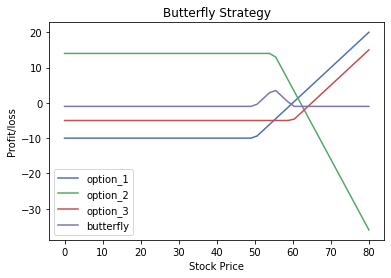

In [24]:
# Initial stock price
s0 = 100

# Strike & premium
strike_1 = 50
premium_1 = 10
strike_2 = 55
premium_2 = 7
strike_3 = 60
premium_3 = 5

def long_call(K, P, s):
    if s < K:
        return - P
    else:
        return s - K - P

def short_call(K, P, s):
    return -long_call(K,P,s)

sT = np.linspace(0,80)

call_option_1 = []

for i in sT:
    call_option_1.append(long_call(50, 10, i))

plt.plot(sT, call_option_1, label="option_1")

call_option_2 = [2*short_call(55,7,s) for s in sT]
plt.plot(sT, call_option_2, label="option_2")


call_option_3 = [long_call(60,5,s) for s in sT]
plt.plot(sT, call_option_3, label="option_3")


def butterfly_strategy(s):
    return long_call(50,10,s) + long_call(60,5,s) + (2*short_call(55,7,s))

b = [butterfly_strategy(s) for s in sT]

plt.plot(sT, b, label="butterfly")


plt.title('Butterfly Strategy')
plt.xlabel('Stock Price')
plt.ylabel('Profit/loss')
plt.legend(loc="lower left")

<h2><span style="color:blue">3 (i) Why might an investor enter into such a strategy?</h2>

<h2><span style="color:green">Solution</span>

An investor would enter into such a strategy
because there is a limited risk exposure compared to a Short Straddle strategy specifically
when an underlying stock moved beyond the breakeven point on expiration date.

Also, there is chance to make profit from a range bound stock with relatively lower cost outlay.

**`(Long Call Butterfly Option Trading Strategies, 2022)`**

<h1><center> Answer 4 </center></h1>

<h2><span style="color:blue">4(a) Calculate the daily returns of these stocks. You should use the adjusted daily
closing price.</span>

<h2><span style="color:green">Solution</span>


We first download the data for the specified duration

In [25]:
tickers = ["aapl","goog","amzn","fb"]
stock_data = yf.download(tickers, start="2017-01-01", end="2020-12-31")
aapl = yf.Ticker("aapl")
goog = yf.Ticker("goog")
amzn = yf.Ticker("amzn")
fb   = yf.Ticker("fb")
#stock_data.head()`

[*********************100%***********************]  4 of 4 completed


We first extract the **Adjusted Close** price from the downloaded data, followed by calculatiing **percentage change** on a daily basis and then print the first five results after **removing the null values**

In [26]:
stock_prices = stock_data['Adj Close']
daily_returns = stock_prices.pct_change()
daily_returns.dropna().head(5)

,AAPL,AMZN,FB,GOOG
Date,,,,
2017-01-04,-0.001119,0.004657,0.015660,0.000967
2017-01-05,0.005085,0.030732,0.016682,0.009048
2017-01-06,0.011148,0.019912,0.022707,0.015277
2017-01-09,0.009160,0.001168,0.012074,0.000620
2017-01-10,0.001009,-0.001280,-0.004404,-0.002306



<h2><span style="color:blue">4(b) Based on a), find the covariance matrix of these stocks.</span>

<h2><span style="color:green">Solution</span>

We calculate the covarince matrix from daily returns after removing the null values <br>

The **variance** of a variable can derived using the formula below

<span style= font-size:2em;>$\sigma^2(r)$ = $\sum_{i=0}^{n}p(i)\times(r(i)-E(r))^2$---(1)</span>

The **covariance** between two variables can then be described as

<span style= font-size:2em;>$Cov(r_{1},r_{2})$ = $E[r_{1}r_{2}]-E[r_{1}]E[r_{2}]$---(2)</span>

**`(Goodell, 2022)`**

In [27]:
covariance_matrix=daily_returns.dropna().cov()
print(covariance_matrix)

          AAPL      AMZN        FB      GOOG
AAPL  0.000398  0.000246  0.000263  0.000237
AMZN  0.000246  0.000372  0.000261  0.000230
FB    0.000263  0.000261  0.000460  0.000263
GOOG  0.000237  0.000230  0.000263  0.000306


Now, we will also print the correlation matrix to be used later in the last part of the question

The **correlation** $\rho$ between two variables can be given as

<span style= font-size:2em;>$\rho(r_{1},r_{2})$ = $\frac{Cov(r_{1},r_{2}}{\sigma_{1}\sigma_{2}}$---(3)</span>

**`(Goodell, 2022)`**

In [28]:
daily_returns.corr()

,AAPL,AMZN,FB,GOOG
AAPL,1.000000,0.640099,0.615644,0.679506
AMZN,0.640099,1.000000,0.631663,0.682847
FB,0.615644,0.631663,1.000000,0.701704
GOOG,0.679506,0.682847,0.701704,1.000000


<h2><span style="color:blue">4(c) Suppose that the four stocks are equally weighted, find the annualised portfolio
expected returns and portfolio variance</span>

<h2><span style="color:green">Solution</span>

To calculate the annualzed expected returns we will use the **`PyPortfolioOptimization`** Library

We will now calculate expected returns of the portfolio using the pypfopt library and using mean historical returns

The annualzed portfolio returns are given by

<span style= font-size:2em;>$Annualized\ Return = (1 + Return)^{\frac{252}{N}} - 1$---(4)</span>

**`(Li, 2022)`**


In [29]:
#Calculating mu
mu = expected_returns.mean_historical_return(stock_prices)
#Creating equal portfolio weights
weights=np.repeat(1/4,4)

#Transposing the mu Matrix
mu_matrix=pd.DataFrame(mu).T


#Calculating Annualized portfolio return
annualized_expected_return=sum(mu_matrix.mul(weights,axis=1).iloc[0])*100


print("The annualized expectednp return on the portfolio is {} %".format(np.round(annualized_expected_return,2)))

The annualized expectednp return on the portfolio is 34.74 %


Now we **calculate the variance** by first calculating the covariance matrix and then multiplying covariance with weights

In [30]:
#Annualizing the covariance matrix 
covariance = (covariance_matrix)*252

#Calculating variance 
variance= np.dot(weights.T, np.dot(covariance, weights))

print("The portfolio variance is {} %".format(np.round(variance*100,4)))

The portfolio variance is 7.149 %


<h2><span style="color:blue">4(d) Find the efficient portfolio with the maximum Sharpe ratio. What is the
corresponding Sharpe ratio?</span>

<h2><span style="color:green">Solution</span>

To find the **Maximum Sharpe Ratio** we again use the **`PyPortfolioOptimization`** Library

**`(Li, 2022)`**

We first calculate the mu, and Sigma then proceed on to calculate efficient frontier

We then calculate the Maximum Sharpe Ratio and also print the weights of the efficient portfolio.

The **Sharpe Ratio** is given by

<span style= font-size:2em;>$\frac{risk \space premium}{SD \space of \space excess \space return}$ = $\frac{E(r)-r_{f}}{\sigma}$---(6)</span>


**`(Goodell, 2022)`**

In [31]:
# Calculate expected returns mu
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)


In [32]:
ef=EfficientFrontier(mu, Sigma)
# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print("The weights for the efficient portfolio are")
cleaned_weights_maxsharpe

The weights for the efficient portfolio are


OrderedDict([('AAPL', 0.55613), ('AMZN', 0.44387), ('FB', 0.0), ('GOOG', 0.0)])

In [33]:
print("The Maximum Sharpe Ratio and other portfolio ")
ef.portfolio_performance(verbose=True)

The Maximum Sharpe Ratio and other portfolio 
Expected annual return: 46.9%
Annual volatility: 28.3%
Sharpe Ratio: 1.59


(0.4688964435526243, 0.283125194273922, 1.585505114455902)

Therefore, the **Maximum Sharpe Ratio** is 1.59

<h2><span style="color:blue">4(e) Plot the efficient frontier.</span>

<h2><span style="color:green">Solution</span></h2><br>
    
We plot the efficient frontier two ways, we calculate the Max Sharpe ration, and Minimum volatility portfolio and plot it along with the assets.

Then we generate a 1000 randomly generated suboptimal portfolios and plot them along with the efficient frontier as well. 
    
**`(PyPortfolioOpt)`**
    

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sharpe_ratio=EfficientFrontier(mu, Sigma)
# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = sharpe_ratio.max_sharpe()
cleaned_weights_maxsharpe = sharpe_ratio.clean_weights()


In [35]:
ef_min = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_min = ef_min.min_volatility()
cleaned_weights_min = ef_min.clean_weights()

# Portfolio performance

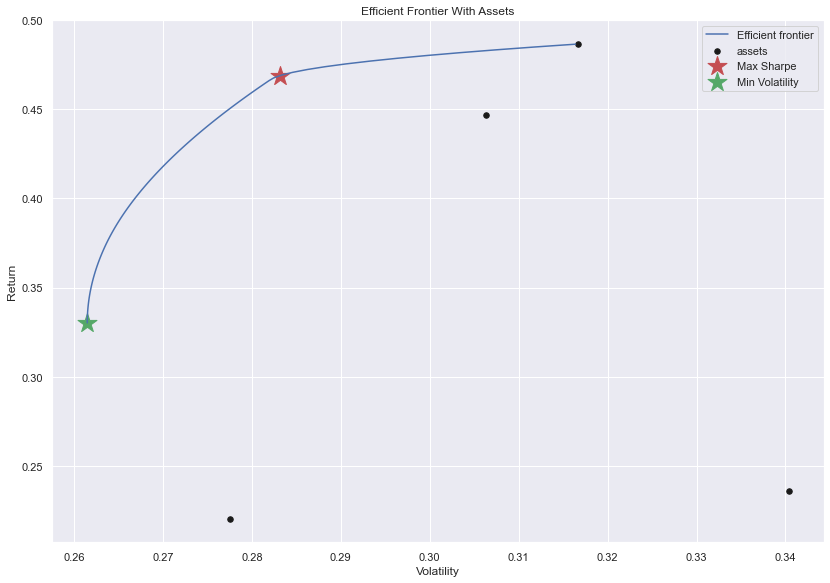

In [36]:
ef = EfficientFrontier(mu, Sigma)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title("Efficient Frontier With Assets")
plotting.plot_efficient_frontier(ef, ef_param="return", ax=ax, show_assets=True)

ret_tangent, std_tangent, _ = sharpe_ratio.portfolio_performance()
ret_tangent_, std_tangent_, _ = ef_min.portfolio_performance()

ax.scatter(std_tangent, ret_tangent, marker="*", s=400, c="r", label="Max Sharpe")
ax.scatter(std_tangent_, ret_tangent_, marker="*", s=400, c="g", label="Min Volatility")
ax.legend()


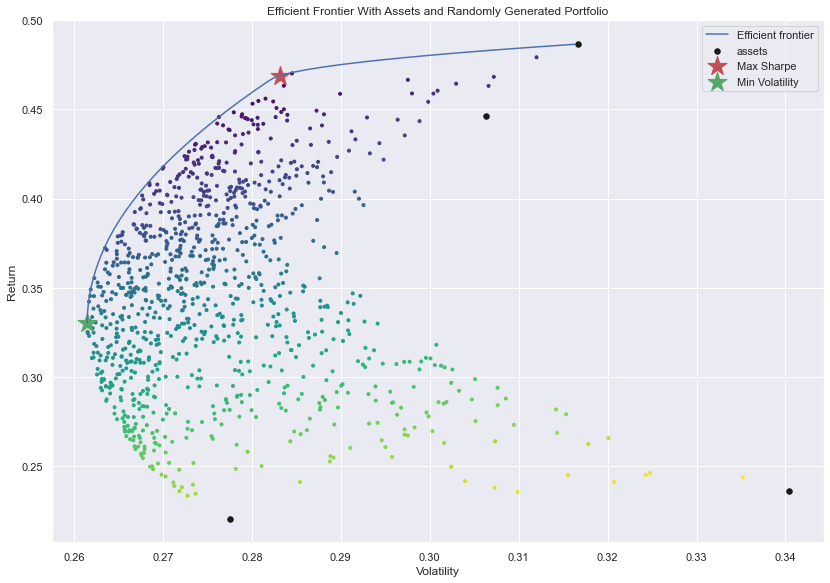

In [37]:
ef = EfficientFrontier(mu, Sigma)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title("Efficient Frontier With Assets and Randomly Generated Portfolio")
plotting.plot_efficient_frontier(ef, ef_param="return", ax=ax, show_assets=True)

ret_tangent, std_tangent, _ = sharpe_ratio.portfolio_performance()
ret_tangent_, std_tangent_, _ = ef_min.portfolio_performance()

# Generate random portfolios
n_samples = 1000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
returns = w.dot(ef.expected_returns)
standard_deviation = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = returns / standard_deviation
ax.scatter(standard_deviation, returns, marker=".", c=sharpes, cmap="viridis_r")
"""Code referenced from (PyPortfolioOpt) """

ax.scatter(std_tangent, ret_tangent, marker="*", s=400, c="r", label="Max Sharpe")
ax.scatter(std_tangent_, ret_tangent_, marker="*", s=400, c="g", label="Min Volatility")
ax.legend()



<h2><span style="color:blue">4(f) Based on the concept of diversification, comment on the current portfolio. How can
this portfolio be improved? [answers should be no longer than 200 words]</span>

<h2><span style="color:green">Solution</span>

The current portfolio only consists of Stocks that are largely positively correlated with no diversified risk **`(Jasch, Diversifikation 2016)`**. This can be verified from the correlation matrix printed above or the relative movement of these stocks can also be inferred from the covariance matrix, albeit it doesn’t show the relationship between them (Banton, 2022). The current portfolio has stocks that move together, which is risky because the profits of one will not balance the losses of the other in the case of a crisis. <br>

According to Markowitz, an efficient portfolio would maximize returns while minimizing the risk, therefore the first step would be to minimize the risk by diversifying investments by including more types of investments. The current portfolio only consists of the stocks of big companies, to diversify the current portfolio, we could include stocks that have a negative correlation with current stocks. Additionally, we could include investments belonging to other risk classes **`(Jasch, Diversifikation 2016)`** , for example, fixed-term deposits, bonds, European money market funds, pension bonds, risk-free government bonds. Although our Sharpe ratio is positive and greater than 1 **`(Team Investopedia, 2022)`**, which implies it’s a good portfolio but it can be further improved through diversification.

<h1><center> Answer 5 </center></h1>

### The 2015-vbt-smoker-distinct-alb-anb.xlsx is included in the submission folder. It was downloaded from http://www.soa.org/files/research/exp-study/2015-vbt-smoker-distinct-alb-anb.xlsx

In [38]:
#importing 2015 Valuation Basic Table (VBT) - http://www.soa.org/files/research/exp-study/2015-vbt-smoker-distinct-alb-anb.xlsx
df=pd.read_excel("2015-vbt-smoker-distinct-alb-anb.xlsx",sheet_name=3,header=2)
df.head()

,Iss. Age,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,Ult.,Att. Age
0,18,0.27,0.27,0.27,0.27,0.27,0.29,0.33,0.34,0.34,...,0.73,0.86,1.03,1.17,1.29,1.40,1.49,1.58,1.67,43
1,19,0.27,0.27,0.26,0.26,0.27,0.31,0.33,0.33,0.33,...,0.86,1.01,1.16,1.29,1.40,1.49,1.58,1.67,1.76,44
2,20,0.24,0.23,0.24,0.25,0.29,0.31,0.32,0.32,0.34,...,1.00,1.14,1.27,1.40,1.49,1.58,1.67,1.76,1.87,45
3,21,0.19,0.21,0.23,0.26,0.29,0.30,0.31,0.33,0.37,...,1.13,1.26,1.38,1.49,1.58,1.67,1.76,1.87,2.05,46
4,22,0.17,0.20,0.24,0.27,0.28,0.30,0.32,0.35,0.39,...,1.24,1.36,1.48,1.58,1.67,1.76,1.87,2.05,2.25,47


### If today is 13 March 2022 and Alice was born on 28 October 1983 then the Age Nearest Birthday (ANB) will be 39

In [39]:
#one year conditional mortality

cond_mor_per_1000=df.iloc[21,:]
cond_mor_per_1000

Iss. Age    39.00
1            0.39
2            0.57
3            0.77
4            0.94
5            1.08
6            1.21
7            1.34
8            1.70
9            1.96
10           2.25
11           2.52
12           2.80
13           3.15
14           3.51
15           3.90
16           4.35
17           4.83
18           5.34
19           5.93
20           6.58
21           7.31
22           8.12
23           9.01
24          10.01
25          11.09
Ult.        12.28
Att. Age    64.00
Name: 21, dtype: float64

<h2><span style="color:blue">5(a) Calculate Alice’s annal unconditional survival rates 𝑛𝑝𝑥 from now to age 42.</span>

<h2><span style="color:green">Solution</span>

### Unconditional survival rates
\begin{equation}
{ }_{n} p_{x}= \begin{cases}1, & n \leq 0 \\ \prod_{m=0}^{n-1}\left(1-{ }_{m \mid} q_{x}\right), & n \geq 1\end{cases}
\end{equation}

In [40]:
#one year conditional mortality
cond_mor=np.append(np.array(cond_mor_per_1000.iloc[1:-1]),np.array(df['Ult.'].iloc[22:]))/1000
cond_mor=np.append(0,cond_mor)


#one year conditional survival
cond_sur=1-cond_mor


#unconditional survival rates
uncond_sur=[]
uncond_sur.append([np.prod(cond_sur[0:i+1]) for i in range(0,len(cond_sur))])

uncond_sur=np.round(np.array(uncond_sur).reshape(cond_sur.shape),6)

np.set_printoptions(suppress=True)
print("Alice’s annal unconditional survival rates from now to age 42 = ", uncond_sur[0:5] )

Alice’s annal unconditional survival rates from now to age 42 =  [1.       0.99961  0.99904  0.998271 0.997333]


<h2><span style="color:blue">5(b) Calculate Alice’s life expectancy in years (show one decimal place).</span>

<h2><span style="color:green">Solution</span>

$$LE= \sum_{n>0} nPx - 0.5$$

In [41]:
#life expectancy
le=np.round(np.sum(uncond_sur)-0.5,1)
print("Alice’s life expectancy is "+str(le) + " years")

Alice’s life expectancy is 42.0 years


<h2><span style="color:blue">5(c) Calculate the probability that Alice dies exactly between 6 and 9 years from now
(show five decimal places).</span>

<h2><span style="color:green">Solution</span>

### Probability that Alice dies exactly between 6 and 9 years from now
$$P(6 \le n \le 9)= P(n=6)+P(n=7)+P(n=8)+P(n=9)$$
Where $P(n=x)$ is the probability that the person dies between year $n-1$ and n

In [42]:
#Pn
pn=[cond_mor[i]*uncond_sur[i-1] for i in range(1,len(cond_mor))]
pn=np.append(0,pn)
p=np.round(sum(pn[7:10]),5)
print("Probability that Alice dies exactly between 6 and 9 years from now is " + str(p))

Probability that Alice dies exactly between 6 and 9 years from now is 0.00497


<h2><span style="color:blue">5(d) Calculate the minimum annual premium rate (premium as a fraction of death
benefit) that your company should charge for Alice’s cohort (show five decimal
places).</span>

<h2><span style="color:green">Solution</span>

### Finding the minimum annual premium rate can be done by finding the value at which breakeven would occur.

$$PV=\sum_{n=0}^{\infty} \frac{nPx . \pi_n - P_n .DB}{(1+r)^n} =0 $$


Where $DB$ is the death benefit amount, $\pi_n$ is the premium to be paid at time n, $r$ is the valuation interest rate and $nPx$ is the probability that a person aged $x$ is alive at the end of the $n^{th}$ year.


### We solve for $\frac{\pi_n}{DB}$

In [43]:
r=0.035
n=np.sum([pn[i]/((1+r)**(i)) for i in range(len(pn))])
m=np.sum([uncond_sur[i]/((1+r)**(i)) for i in range(len(uncond_sur))])
x=np.round((n/m)*100,5)

print("The minimum annual premium rate that the company should charge for Alice’s cohort = " +str(x) + " %")

The minimum annual premium rate that the company should charge for Alice’s cohort = 1.15344 %


<h2><span style="color:blue">5(e)What technologies can you apply to enable a closer prediction on the company’s
cash flow linked to this line of business of permanent life insurance? [answers should be no longer than 200 words]</span>

<h2><span style="color:green">Solution</span>

The conventional mortality tables and actuarial formulas that life insurance firms use to create underwriting rules or estimate life expectancies can be time consuming, expensive, and inaccurate. Supervised machine learning along with internet of things (IoT) technology can provide cheaper and more robust solutions for insurance companies **`(Boodhun & Jayabalan, 2018)`**. Internet-connected wearable devices can continuously share the insurers’ level of activity as well as vital signs (heart rate, blood pressure, blood glucose level, etc.) with the insurance company. Also, some cars are connected to the internet and equipped with telematics sensors that can monitor driving styles. The insurance company can incorporate vital signs and driving stye with machine learning techniques to accurately perform risk assessment **`(Braun & Schreiber, 1970)`**. Moreover, insurance companies can predict whether an insurance contract will fail or not by training machine learning models on features from historical failed contracts such as time between the star and expiry of a contract, premium and size of the contract. This will allow insurance companies to make better future contract decisions **`(Azzone et al., 2022)`**

<h1><center> Answer 6 </center></h1>

<h2><span style="color:blue">6(a) Describe what emerging technologies could be utilised and how they could be
applied in the business infrastructure</span>

<h2><span style="color:green">Solution</span>

The proposal would be to use a combination of emerging technologies in a cost-effective manner. Since the current model is a traditional brokerage/wealth-management setup, it would comprise human analysts, relationship managers, and traditional data storage that could be on hard disks, physical files, servers, and other forms. A combination of multiple emerging digital technologies can be used, starting first with a digital transformation of the current model, by building a serverless web app for the brokerage’s customers along with a mobile app-based one of the leading cloud platforms like AWS or Google Cloud.
The web-app/mobile app will give customers a self-servicing, personalized dashboard indicating their total investments, type of investments, real-time analysis of their portfolios based on concepts like Modern Portfolio Theory **`(Jasch, Diversifikation 2016)`**, that is, volatility and estimated returns, and what kind of investments they can further make provided by a machine learning-based recommendation engine based on the customer’s current portfolio.

The recommendation engine could be fed by results from risk models deployed in the company internally. This could be an amalgamation of human analysts working along with a data-science team, for forecasting stock prices, risks, decisions to be made while being in check with people who understand key financial concepts keeping the models from overfitting and making erroneous, underperforming predictions on data **`(Buczynski et al., 2021)`**.


The company’s major profit would come from the fee charged by the company from transactions, and the performance of the financial assets company prompts its customers to buy, therefore it is extremely important for the company to be aware of the overfitting scenario and leverage even Deep-learning/Reinforcement learning for those scenarios **`(Prasad & Seetharaman, 2021)`**.
Multiple APIs can be deployed to effectuate the purchasing/selling decisions in real-time and data warehousing can be again through leading solutions from the same cloud platforms, to capture customer behavior on the dashboards and how users are making purchasing/selling decisions to study their behavior for better maximizations of fees and even performance using predictive solutions in the future using machine-learning solutions. 

The company’s web app could charge an additional fee in a subscription-based manner, effectively looking at a SaaS-like solution to provide AI/ML-based insights, with more granular transparency and more investment opportunities for the customer **`(Fong et al., 2021)`**.

Based on the amount of investment the company wants to make, the company could also use Blockchain technology for the tokenization of assets, smart contracts to execute purchasing and selling decisions while using the same business model. 

<h2><span style="color:blue">6(b) What type of new business models could you also look to if you were thinking of
reinventing your business scope and why? </span>

<h2><span style="color:green">Solution</span>

The brokerage could evaluate multiple options to change the scope of the current business model based on the risk it wants to take. The current model is a traditional brokerage based on a B2B2C model heavily reliant on time-consuming **`(McKinsey, 2022)`** but pivotal activities like relationship management. 

The first option could be to evaluate any of the emerging business models, such as a platform, where the insights for wealth management scenarios are sold as a software-as-a-service model. Since it is a platform, the company can match buyers and sellers, provide some basic analytics, recommendations based on more standard analytics, and recommendation systems and then sell advanced analytics on the top for a nominal fee, with the human relationship management along with advanced analytics as another subscription **`(Fong et al., 2021)`**. The why of this option could help manage existing problems with the current model while relying on the knowledge base that already exists in the company. Verily, there will be investments but they will largely digitize what exists right now whilst making use of the existing knowledge base and diverging too much from the current expertise. The platform model, would in-turn additional data, that could be used for cross-selling insurance, and other fintech products. 

The second option could be to evaluate a P2P model but in a B2B way since the example of Funding Circle shows a shift from consumers to institutions for a cost-effective way, where businesses could meet the funding requirements of other businesses. This approach could also combine a platform model, and leverage the related technology from APIs, cloud platforms, machine learning whilst being cognizant of the risks related to overfitting **`(Buczynski et al., 2021)`**.

The third option could be to head for a complete overhaul and combine a few of the above aspects like P2P, and establish DAO, leveraging the power of Blockchain and inherent features of finality and immutability that come with it. A DAO would enforce smart contracts, enforcing the rules in an automated manner, and tokenization of the assets could introduce capital efficiency, enabling a scalable way to raise capital, while also providing aligned incentives for all the users if the portfolio or the asset performs well **`(Vadgama, 2022)`**. The tokenization of assets, smart contracts for purchase, settlement, transaction fee, automated, real-time distribution of aligned incentives would be extremely efficient from a wealth management perspective. The value, performance, and scalability of this model would be the strongest “whys” to adopt.


<br>
<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>

<h2><span style="color:blue">6(c) What new emerging financial products would be most suitable to add to
complement the existing products of the business and why? </span> </h2>
 

    



<h2><span style="color:green">Solution</span>



For the existing products, the first step the company could take would be to leverage the power of advanced analytics, especially looking at enhancing the efficiency of Relationship Managers(RMs), using various metrics to track performance, engagement with clients, satisfaction, and focusing on modernizing the entire portfolio stack to break away from the “one-model fits all” and processing data manually, to a more personalized set-up where solutions are tailored to complex client needs **`(McKinsey, 2022)`**. 

RMs currently spend around 60-70% of their current time on non-advisory activities which are non-revenue generating spending time on things like manually processing data, meeting regulatory and compliance requirements, and other admin activities. It’s estimated that IT-based transformations could lead to an incremental value of $40-45 billion in Asia alone **`(McKinsey, 2022)`**.

But the digitization and personalization cannot be achieved from advanced analytics alone. The brokerage could use Robo-Advisory in wealth management and advisory, which will help with personalization and recommendation, adding another cog of good user experience in the stack that can be augmented by the human on a need basis. Robo-advisory 4.0 has achieved greater personalization by being fully automated and can make real-time adjustments to portfolios according to market conditions, risk appetite, profit, investment strategies, and liquidity aspects **`(Deloitte, 2016)`**. 
Although there’s caution around fully automated portfolio decisions since AI still has incomplete advancement with Finance theory **`(Vadgama, 2022)`** and models often overfit on training data and have poor real-world performance **`(Buczynski et al., 2021)`**.

To save time on meeting the regulatory and compliance requirements, the brokerage could adopt Blockchain as a fintech solution, as it allows a digital wrapper around assets and enables trading on decentralized networks with properties like immutability and finality along with security and privacy **`(Arora & Ramrakhani)`**.
Not only using blockchain will help save time, but tokenization will help remove mediators, reducing transaction time, and features such as broadcasting of messages, and accessibility of all transactions to all the members would increase transparency and trust **`(Corrales, 2020)`**.

Another technology that can help with regulatory and compliance activities along with faster on-boarding, would be to employ smart contracts on the blockchain with codified rules that make decisions fully automated, such as selling beyond a threshold profit value, buying beyond a threshold value, and so on.

The overall stack can be digitized using advanced analytics, Robo-advisory, and blockchain without changing the current B2B2C model, emphasizing making the client experience more personalized.


## References

Analytics transformation in wealth management [Internet]. McKinsey & Company. McKinsey & Company; 2022 [cited 2022Mar23]. Available from: https://www.mckinsey.com/industries/financial-services/our-insights/analytics-transformation-in-wealth-management <br>

Azzone M, Barucci E, Giuffra Moncayo G, Marazzina D. A machine learning model for lapse prediction in life insurance contracts. Expert Systems with Applications. 2022;191:116261.<br>

Banton C. Calculating covariance for stocks [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar20]. Available from: https://www.investopedia.com/articles/financial-theory/11/calculating-covariance.asp <br>

Bodie Z, Kane A, Marcus AJ. Investments. New York etc.: McGraw-Hill Education; 2018. 

Boodhun N, Jayabalan M. Risk prediction in life insurance industry using supervised learning algorithms. Complex &amp; Intelligent Systems. 2018;4(2):145–54.<br>

Braun A, Schreiber F. The current InsurTech Landscape: Business models and disruptive potential [Internet]. EconStor. St. Gallen: Verlag Institut für Versicherungswirtschaft der Universität St. Gallen; 1970 [cited 2022Mar25]. Available from: https://www.econstor.eu/handle/10419/226646<br>

Buczynski W, Cuzzolin F, Sahakian B. A review of machine learning experiments in equity investment decision-making: Why most published research findings do not live up to their promise in real life. International Journal of Data Science and Analytics. 2021;11(3):221–42.<br>


Campbell  B. Par Curve, Spot Curve, and Forward Curve [Internet]. Financial exam help 123. 2013 [cited 2022Mar20]. Available from: http://www.financialexamhelp123.com/par-curve-spot-curve-and-forward-curve/ <br>

CFA Free 101 concepts [Internet]. IFT World Concept 62 Beta of a Project Comments. [cited 2022Mar21]. Available from: https://ift.world/concept1/concept-62-beta-project/ <br>

Chen J. Dividend discount model – DDM [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/terms/d/ddm.asp <br>

Chen J. Multistage dividend discount model [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/terms/m/multistageddm.asp#:~:text=The%20multistage%20dividend%20discount%20model%20is%20an%20equity%20valuation%20model,applied%20to%20different%20time%20periods.<br>

Corporate  Finance Institute. Dividend per share (DPS) [Internet]. Corporate Finance Institute. 2022 [cited 2022Mar21]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/finance/dividend-per-share/ <br>

Corporate Finance Institute. Unlevered beta / asset beta [Internet]. Corporate Finance Institute. 2022 [cited 2022Mar21]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/valuation/unlevered-beta-asset-beta/ <br>

Cost of equity (KE): Formula and excel calculator [Internet]. Wall Street Prep. [cited 2022Mar25]. Available from: https://www.wallstreetprep.com/knowledge/cost-of-equity/ <br>

Dividend-based stock valuation: The two-stage dividend discount model [Internet]. Dividend.com. [cited 2022Mar21]. Available from: https://www.dividend.com/dividend-education/the-two-stage-dividend-discount-model/ <br>

Fernando J. Internal Rate of Return (IRR) [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/terms/i/irr.asp <br>

Fong D, Han F, Liu L, Qu J, Shek A. Seven technologies shaping the future of Fintech: Greater China [Internet]. McKinsey & Company. McKinsey & Company; 2021 [cited 2022Apr24]. Available from: https://www.mckinsey.com/cn/our-insights/our-insights/seven-technologies-shaping-the-future-of-fintech <br>

Forward Contracts vs. Futures Contracts: What's the Difference? [Internet]. Investopedia. 2022 [cited 21 March 2022]. Available from: https://www.investopedia.com/ask/answers/06/forwardsandfutures.asp

Goodell G. Corporate Finance 2 COMP0164 Lecture 3 (Week 27). Lecture presented at; University College London; 2022 25 January.<br> 

Goodell G. Derivatives & Forwards and Futures COMP0164 Lecture 5 (Week 5). Lecture presented at; University College London; 2022 8 February.<br>

Goodell G. Portfolio Theory and Management COMP0164 Lecture 7 (Week 22). Lecture presented at; University College London; 2022 Mar 1.  <br>


Hargrave M. How to calculate the weighted average cost of capital (WACC) [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar17]. Available from: https://www.investopedia.com/terms/w/wacc.asp <br>

Hayes A. What is a dividend payout ratio? [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/terms/d/dividendpayoutratio.asp#:~:text=The%20dividend%20payout%20ratio%20is,paid%20to%20shareholders%20via%20dividends <br>

https://www.accaglobal.com ACCA-. The Capital Asset Pricing Model – Part 2 [Internet]. ACCA Global. [cited 2022Mar21]. Available from: https://www.accaglobal.com/uk/en/student/exam-support-resources/fundamentals-exams-study-resources/f9/technical-articles/capm-part2.htm.html <br>

Jagerson J. What is the formula for Calculating Net Present Value (NPV)? [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/ask/answers/032615/what-formula-calculating-net-present-value-npv.asp <br>

Jasch Ax. Diversifikation [Internet]. Companisto. [cited 2022Mar18]. Available from: 
https://www.companisto.com/en/academy/anlageformen-und-strategien/diversifikation-und-moderne-portfolio-theorie <br>

Kenton W. Capital Asset Pricing Model (CAPM) [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar22]. Available from: https://www.investopedia.com/terms/c/capm.asp <br>

Li M. Portfolio applications Lab 7. Lecture presented at; University College London; 2022 Mar 5.  
Murphy CB. Understanding the sustainable growth rate (SGR) [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/terms/s/sustainablegrowthrate.asp#:~:text=The%20sustainable%20growth%20rate%20(SGR)%20is%20the%20maximum%20rate%20of,growth%20without%20increasing%20financial%20leverage. <br>

Long Call Butterfly Option Trading Strategies [Internet]. Trade-stock-option.com. 2022 [cited 21 March 2022]. Available from: http://www.trade-stock-option.com/long-call-butterfly.html

Plotting¶ [Internet]. Plotting - PyPortfolioOpt 1.5.2 documentation. PyPortfolioOpt; [cited 2022Mar22]. Available from: https://pyportfolioopt.readthedocs.io/en/latest/Plotting.html <br>

Prasad A, Seetharaman A. Importance of machine learning in making investment decision in stock market. Vikalpa: The Journal for Decision Makers. 2021;46(4):209–22.<br>

Present value of growth opportunities (PVGO) [Internet]. Corporate Finance Institute. 2022 [cited 2022Mar21]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/valuation/present-value-growth-opportunities-pvgo/ <br>

Team TI. Modern portfolio theory (MPT) [Internet]. Investopedia. Investopedia; 2022 [cited 2022Mar21]. Available from: https://www.investopedia.com/terms/m/modernportfoliotheory.asp <br>

Thurman J. Implementing the Binomial Option Pricing Model [Internet]. Joseph Thurman. 2022 [cited 18 March 2022]. Available from: http://www.josephthurman.com/binomial3.html

Unlevered beta / asset beta [Internet]. Corporate Finance Institute. 2022 [cited 2022Mar21]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/valuation/unlevered-beta-asset-beta/ <br>

Vadgama N. Lecture 9 & 10: Emerging Technologies & Business Models in Finance. Lecture presented at; University College London; 2022 Mar 22.<br>

WallStreetPrep. Cost of equity (KE): Formula and excel calculator [Internet]. Wall Street Prep. [cited 2022Mar25]. Available from: https://www.wallstreetprep.com/knowledge/cost-of-equity/ <br>
